In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import heapq

In [ ]:
class Node:
  def __init__(self, value, probability):
    self.value = value
    self.probability = probability
    self.left = None
    self.right = None

  def __lt__(self, other):
    return self.probability < other.probability

In [ ]:
def convert_to_grayscale(matrix):
  shape = matrix.shape
  grayscale = np.zeros((shape[0],shape[1]),dtype="int")
  for i in range(shape[0]):
    for j in range(shape[1]):
      grayscale[i][j] = round(0.299*matrix[i][j][0] + 0.587*matrix[i][j][1] + 0.114*matrix[i][j][2])
  return grayscale

In [ ]:
def load_image(path):
  matrix=cv2.imread(path)
  grayscale = convert_to_grayscale(matrix)
  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  axs[0].imshow(matrix)
  axs[0].set_title("Original Image")
  axs[0].axis('off')
  axs[1].imshow(grayscale, cmap='gray')
  axs[1].set_title("Grayscale Image")
  axs[1].axis('off')
  plt.show()

  return grayscale

In [ ]:
def probabilities(grayscale):
  total_pixels = grayscale.shape[0] * grayscale.shape[1]
  unique_values, counts = np.unique(grayscale, return_counts=True)
  probs = counts / total_pixels
  return unique_values, probs

In [ ]:
def huffman(values,probabilities):
  nodes = [Node(value, probability) for value, probability in zip(values, probabilities)]
  heapq.heapify(nodes)

  while len(nodes) > 1:
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)
    parent = Node(None, left.probability + right.probability)
    parent.left = left
    parent.right = right
    heapq.heappush(nodes, parent)
  # display(nodes[0])
  return nodes[0]

In [ ]:
def display(tree):
  if tree is None:
    return
  display(tree.left)
  print(f"Value: {tree.value}, Probability: {tree.probability}")
  display(tree.right)

In [ ]:
def encode_huffman(tree, current_code, huffman_codes):
    if tree is None:
        return

    if tree.value is not None:
        huffman_codes[tree.value] = current_code
        return

    encode_huffman(tree.left, current_code + "0", huffman_codes)
    encode_huffman(tree.right, current_code + "1", huffman_codes)

In [ ]:
def compress_image(grayscale, huffman_codes):
  compressed_image = ""
  for row in grayscale:
    for pixel in row:
      compressed_image += huffman_codes[pixel]

  return compressed_image

In [ ]:
def decompress_image(compressed_image, huffman_tree, shape):
  decoded_image = []
  current_node = huffman_tree

  for bit in compressed_image:
    if bit == "0":
      current_node = current_node.left
    else:
      current_node = current_node.right

    if current_node.value is not None:
      decoded_image.append(current_node.value)
      current_node = huffman_tree

  decoded_image = np.array(decoded_image).reshape(shape)
  plt.imshow(decoded_image, cmap='gray')
  plt.title("Decoded Image")
  plt.axis('off')
  plt.show()
  return decoded_image

In [ ]:
def huffman_compression(input_path,output_path):
  grayscale = load_image(input_path)
  shape = grayscale.shape
  values,probs = probabilities(grayscale)
  tree = huffman(values,probs)
  huffman_codes = {}
  encode_huffman(tree, "", huffman_codes)
  compressed_image = compress_image(grayscale, huffman_codes)
  print("Size of Image:",grayscale.shape[0]*grayscale.shape[1]*8)
  print("Size of Compressed Image:",len(compressed_image))
  print("Compression %:",((grayscale.shape[0]*grayscale.shape[1]*8-len(compressed_image))/(grayscale.shape[0]*grayscale.shape[1]*8))*100)
  decoded_image = decompress_image(compressed_image, tree, shape)
  cv2.imwrite(output_path,decoded_image)


# print(compressed_image)
# decompress_image(grayscale, huffman_codes)


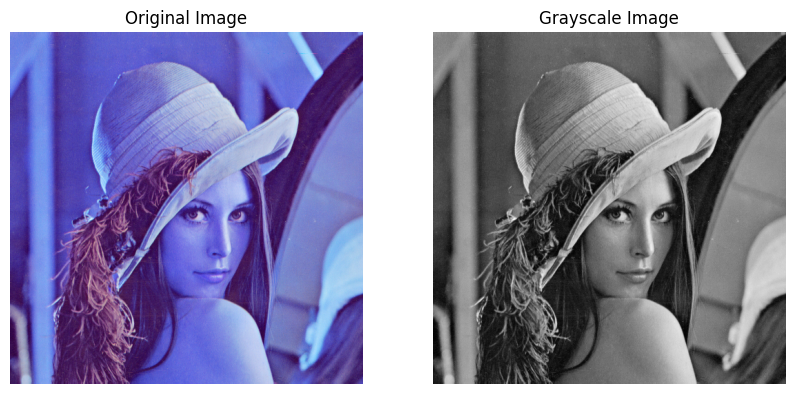

Size of Image: 2097152
Size of Compressed Image: 1940813
Compression %: 7.454824447631836


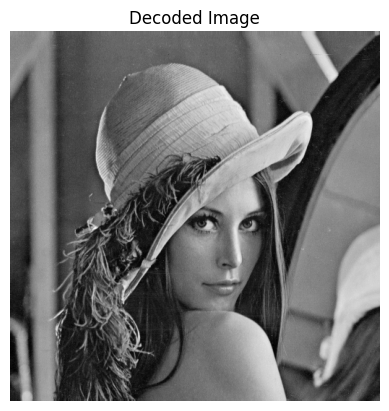

In [ ]:
huffman_compression("/content/lena.png","decoded_image.png")